In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
df=pd.read_csv('Used_Bikes.csv')# read the Used the Used_bikes file
df

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero


In [3]:
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [4]:
df.isnull().sum()#to find the null value

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [5]:
df.duplicated().sum()# for duplicate value

np.int64(25324)

In [6]:
df.shape#for shape

(32648, 8)

In [7]:
df.shape[0]-df.duplicated().sum() #for without duplicate value

np.int64(7324)

In [8]:
df.drop_duplicates(inplace=True)# for remove duplicate value

In [9]:
df

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
9362,Hero Hunk Rear Disc 150cc,25000.0,Delhi,48587.0,First Owner,8.0,150.0,Hero
9369,Bajaj Avenger 220cc,35000.0,Bangalore,60000.0,First Owner,9.0,220.0,Bajaj
9370,Harley-Davidson Street 750 ABS,450000.0,Jodhpur,3430.0,First Owner,4.0,750.0,Harley-Davidson
9371,Bajaj Dominar 400 ABS,139000.0,Hyderabad,21300.0,First Owner,4.0,400.0,Bajaj


In [10]:
cat_col=df.select_dtypes(include='O')
cat_col.head()

,bike_name,city,owner,brand
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,First Owner,TVS
1,Royal Enfield Classic 350cc,Delhi,First Owner,Royal Enfield
2,Triumph Daytona 675R,Delhi,First Owner,Triumph
3,TVS Apache RTR 180cc,Bangalore,First Owner,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,First Owner,Yamaha


In [11]:
num_col=df.select_dtypes(exclude='O')
num_col.head()

,price,kms_driven,age,power
0,35000.0,17654.0,3.0,110.0
1,119900.0,11000.0,4.0,350.0
2,600000.0,110.0,8.0,675.0
3,65000.0,16329.0,4.0,180.0
4,80000.0,10000.0,3.0,150.0


In [12]:
df["bike_name"].nunique()

471

In [13]:
cat_col=cat_col.drop(["bike_name","city"],axis='columns')
cat_col.head()

,owner,brand
0,First Owner,TVS
1,First Owner,Royal Enfield
2,First Owner,Triumph
3,First Owner,TVS
4,First Owner,Yamaha


In [14]:
cat_col['owner'].value_counts()

owner
First Owner             6642
Second Owner             588
Third Owner               84
Fourth Owner Or More      10
Name: count, dtype: int64

In [15]:
lav={"First Owner":1,'Second Owner ':2,"Third Owner":3,'Fourth Owner Or More ':4}
lav

{'First Owner': 1,
 'Second Owner ': 2,
 'Third Owner': 3,
 'Fourth Owner Or More ': 4}

In [16]:
cat_col['owner']=cat_col['owner'].map(lav)

In [17]:
cat_col['owner'].value_counts()

owner
1.0    6642
3.0      84
Name: count, dtype: int64

In [18]:
cat_col['brand'].value_counts()


brand
Bajaj              2081
Royal Enfield      1346
Hero               1142
Honda               676
Yamaha              651
TVS                 481
KTM                 375
Suzuki              203
Harley-Davidson      91
Kawasaki             61
Hyosung              53
Mahindra             50
Benelli              46
Triumph              21
Ducati               20
BMW                  10
Jawa                  7
Indian                3
MV                    3
Rajdoot               1
LML                   1
Yezdi                 1
Ideal                 1
Name: count, dtype: int64

In [19]:
dt1={"Bajaj":1, "Royal Enfield":2, "Hero":3 ,'Honda':4, 'Yamaha':5,' TVS ' :6,' KTM ':7, 'Suzuki':8, 'Harley-Davidson':9 , 'Kawasaki' :10 , 'Hyosung':11, "Mahindra":12, "Benelli":13,"Triumph": 14,"Ducati": 15,"BMW":16,"Jawa":17,"Indian":18,"MV" :19,"Rajdoot" :20,"LML": 21,"Yezdi":22,"Ideal":23 }               
 
dt1

{'Bajaj': 1,
 'Royal Enfield': 2,
 'Hero': 3,
 'Honda': 4,
 'Yamaha': 5,
 ' TVS ': 6,
 ' KTM ': 7,
 'Suzuki': 8,
 'Harley-Davidson': 9,
 'Kawasaki': 10,
 'Hyosung': 11,
 'Mahindra': 12,
 'Benelli': 13,
 'Triumph': 14,
 'Ducati': 15,
 'BMW': 16,
 'Jawa': 17,
 'Indian': 18,
 'MV': 19,
 'Rajdoot': 20,
 'LML': 21,
 'Yezdi': 22,
 'Ideal': 23}

In [20]:
cat_col["brand"]=cat_col["brand"].map(dt1)


In [21]:
cat_col['brand'].value_counts()

brand
1.0     2081
2.0     1346
3.0     1142
4.0      676
5.0      651
8.0      203
9.0       91
10.0      61
11.0      53
12.0      50
13.0      46
14.0      21
15.0      20
16.0      10
17.0       7
18.0       3
19.0       3
20.0       1
21.0       1
22.0       1
23.0       1
Name: count, dtype: int64

In [22]:
cat_col

,owner,brand
0,1.0,NaN
1,1.0,2.0
2,1.0,14.0
3,1.0,NaN
4,1.0,5.0
...,...,...
9362,1.0,3.0
9369,1.0,1.0
9370,1.0,9.0
9371,1.0,1.0


In [23]:
num_col

,price,kms_driven,age,power
0,35000.0,17654.0,3.0,110.0
1,119900.0,11000.0,4.0,350.0
2,600000.0,110.0,8.0,675.0
3,65000.0,16329.0,4.0,180.0
4,80000.0,10000.0,3.0,150.0
...,...,...,...,...
9362,25000.0,48587.0,8.0,150.0
9369,35000.0,60000.0,9.0,220.0
9370,450000.0,3430.0,4.0,750.0
9371,139000.0,21300.0,4.0,400.0


In [24]:
complete_df=pd.concat([cat_col,num_col],axis=1)
complete_df

,owner,brand,price,kms_driven,age,power
0,1.0,NaN,35000.0,17654.0,3.0,110.0
1,1.0,2.0,119900.0,11000.0,4.0,350.0
2,1.0,14.0,600000.0,110.0,8.0,675.0
3,1.0,NaN,65000.0,16329.0,4.0,180.0
4,1.0,5.0,80000.0,10000.0,3.0,150.0
...,...,...,...,...,...,...
9362,1.0,3.0,25000.0,48587.0,8.0,150.0
9369,1.0,1.0,35000.0,60000.0,9.0,220.0
9370,1.0,9.0,450000.0,3430.0,4.0,750.0
9371,1.0,1.0,139000.0,21300.0,4.0,400.0


In [25]:
complete_df.head()

,owner,brand,price,kms_driven,age,power
0,1.0,NaN,35000.0,17654.0,3.0,110.0
1,1.0,2.0,119900.0,11000.0,4.0,350.0
2,1.0,14.0,600000.0,110.0,8.0,675.0
3,1.0,NaN,65000.0,16329.0,4.0,180.0
4,1.0,5.0,80000.0,10000.0,3.0,150.0


In [26]:
complete_df.dtypes

owner         float64
brand         float64
price         float64
kms_driven    float64
age           float64
power         float64
dtype: object

In [27]:
matrix=complete_df.corr()
matrix

,owner,brand,price,kms_driven,age,power
owner,1.000000,0.040010,-0.001520,0.040353,0.146398,0.017981
brand,0.040010,1.000000,0.521650,-0.091652,-0.084273,0.306164
price,-0.001520,0.521650,1.000000,-0.199951,-0.248752,0.807641
kms_driven,0.040353,-0.091652,-0.199951,1.000000,0.367518,-0.168295
age,0.146398,-0.084273,-0.248752,0.367518,1.000000,-0.164211
power,0.017981,0.306164,0.807641,-0.168295,-0.164211,1.000000


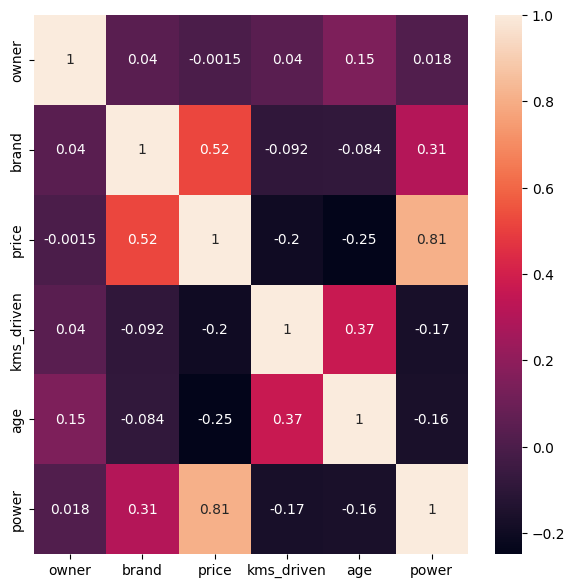

In [28]:
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True)
plt.show()

In [29]:
complete_df

,owner,brand,price,kms_driven,age,power
0,1.0,NaN,35000.0,17654.0,3.0,110.0
1,1.0,2.0,119900.0,11000.0,4.0,350.0
2,1.0,14.0,600000.0,110.0,8.0,675.0
3,1.0,NaN,65000.0,16329.0,4.0,180.0
4,1.0,5.0,80000.0,10000.0,3.0,150.0
...,...,...,...,...,...,...
9362,1.0,3.0,25000.0,48587.0,8.0,150.0
9369,1.0,1.0,35000.0,60000.0,9.0,220.0
9370,1.0,9.0,450000.0,3430.0,4.0,750.0
9371,1.0,1.0,139000.0,21300.0,4.0,400.0


In [30]:
x=complete_df.drop("price",axis=1)
y=complete_df[['price']]

In [31]:
x

,owner,brand,kms_driven,age,power
0,1.0,NaN,17654.0,3.0,110.0
1,1.0,2.0,11000.0,4.0,350.0
2,1.0,14.0,110.0,8.0,675.0
3,1.0,NaN,16329.0,4.0,180.0
4,1.0,5.0,10000.0,3.0,150.0
...,...,...,...,...,...
9362,1.0,3.0,48587.0,8.0,150.0
9369,1.0,1.0,60000.0,9.0,220.0
9370,1.0,9.0,3430.0,4.0,750.0
9371,1.0,1.0,21300.0,4.0,400.0


In [32]:
y

,price
0,35000.0
1,119900.0
2,600000.0
3,65000.0
4,80000.0
...,...
9362,25000.0
9369,35000.0
9370,450000.0
9371,139000.0


In [34]:
from sklearn.model_selection import train_test_split


ModuleNotFoundError: No module named 'sklearn'